Importing Libraries 

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [25]:
df=pd.read_csv(r"C:\Users\hp\Desktop\unemployment data.csv")

Read the data

In [26]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [27]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None


In [28]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max 

In [29]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Region                                      14
 Date                                       14
 Frequency                                  14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
Area                                        14
dtype: int64


In [30]:
df.dropna

<bound method DataFrame.dropna of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.

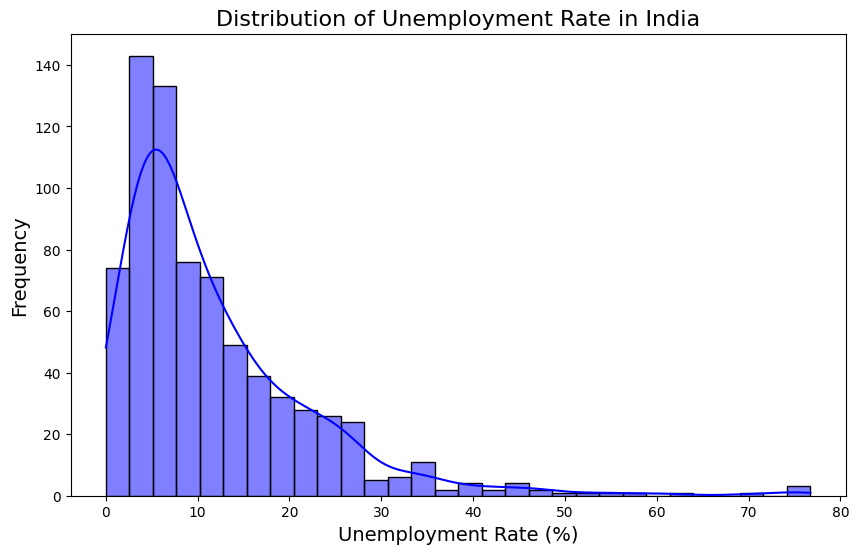

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df[" Estimated Unemployment Rate (%)"], kde=True, bins=30, color='blue')
plt.title('Distribution of Unemployment Rate in India', fontsize=16)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

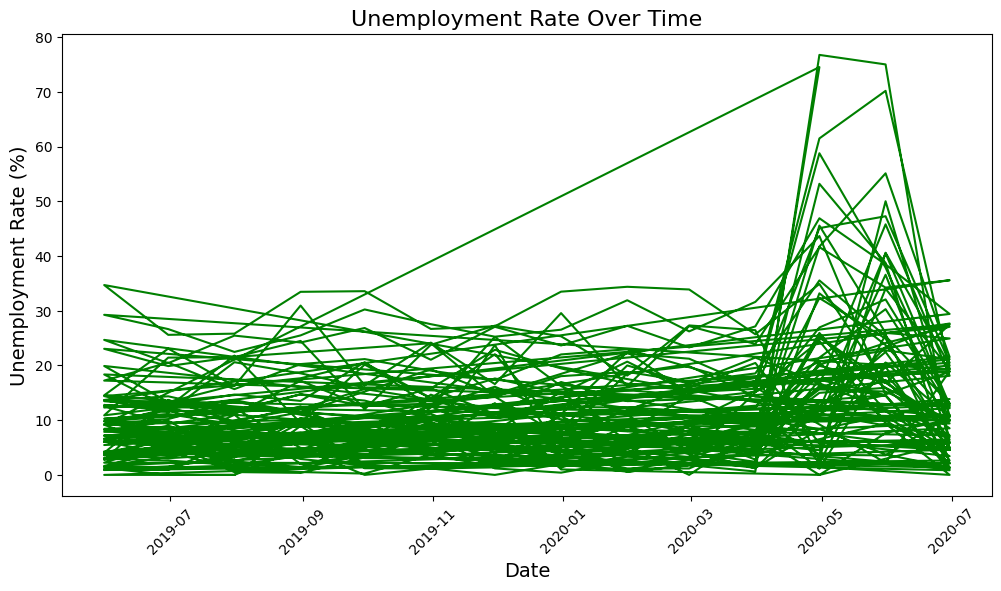

In [44]:
df['Date'] = pd.to_datetime(df[' Date'].str.strip(), format='%d-%m-%Y', errors='coerce')
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df[' Estimated Unemployment Rate (%)'], color='green')
plt.title('Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12580\3744779809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df, palette='viridis')


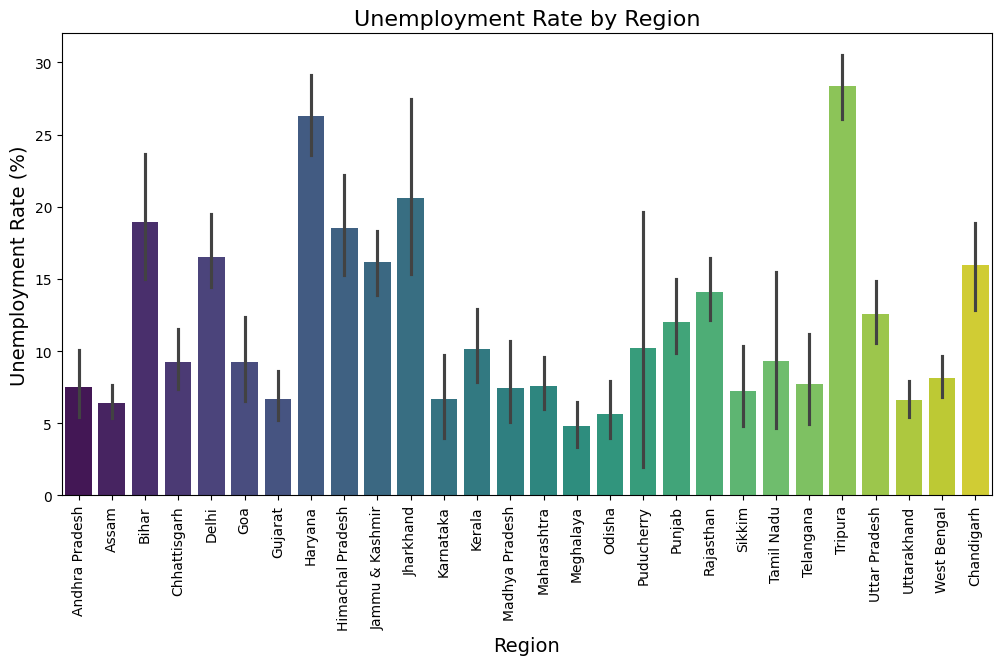

In [46]:
if 'Region' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df, palette='viridis')
    plt.title('Unemployment Rate by Region', fontsize=16)
    plt.xticks(rotation=90)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Unemployment Rate (%)', fontsize=14)
    plt.show()

In [47]:
if 'Date' in df.columns:
    covid_start_date = '2020-03-01'  # Approximate start of COVID lockdowns
    df_covid = df[df['Date'] >= covid_start_date]

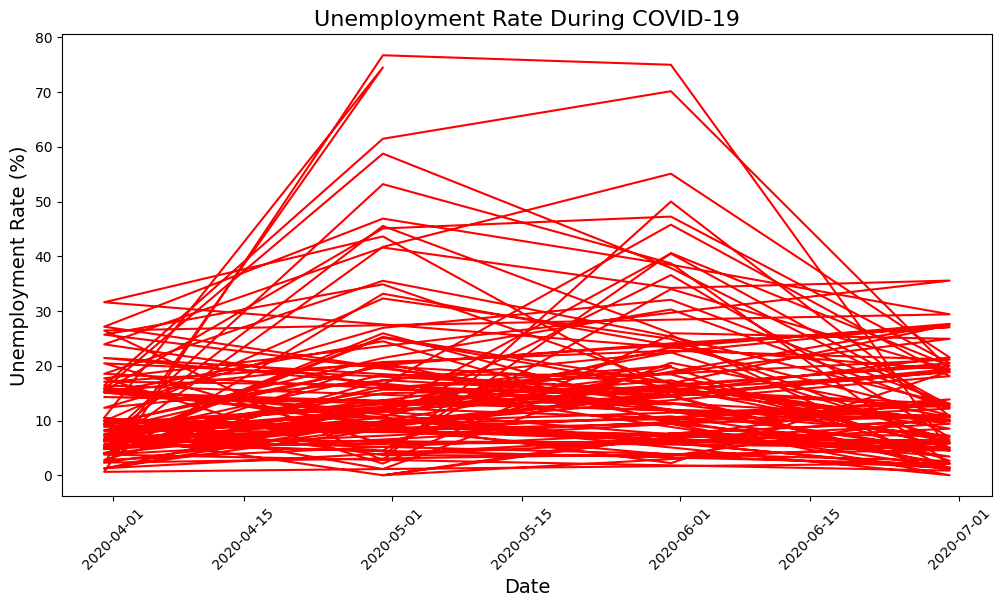

In [50]:
plt.figure(figsize=(12,6))
plt.plot(df_covid['Date'], df_covid[' Estimated Unemployment Rate (%)'], color='red')
plt.title('Unemployment Rate During COVID-19', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [51]:
if 'Date' in df.columns:
    pre_covid = df[df['Date'] < covid_start_date]
    post_covid = df[df['Date'] >= covid_start_date]

In [53]:
print("\nAverage Unemployment Rate Pre-COVID-19:")
print(pre_covid[' Estimated Unemployment Rate (%)'].mean())


Average Unemployment Rate Pre-COVID-19:
9.509533582089553


In [54]:
print("\nAverage Unemployment Rate During/Post-COVID-19:")
print(post_covid[' Estimated Unemployment Rate (%)'].mean())


Average Unemployment Rate During/Post-COVID-19:
17.774362745098042
